# Research on Influencing Factors and Classification Model of Suicide Rate

### CASA0006:Data Science for Spatial Systems

### Student Number: 19097604

Repository with all data and code: [see link here](https://github.com/achengkun1997/CASA0006)

## 1: Introduction
Suicide is the most tragic behavior in human society. It is both a very important public health problem and an extremely serious social problem (Tian, ​​2015). The causes of human suicides are complex and have a wide range of impacts on individuals, families, and society. They should cause a wide range of impacts, and are therefore highly valued by the state. Suicidal behaviors cause irreparable losses to individuals, families and society, and suicidal behaviors have great social harm. The country has gradually paid attention to the causes of suicide and the suicide rate, and has introduced a series of policies. It is hoped that through the development and implementation of the most effective prevention plan, disaster resilience and risk reduction among a wide range of people will be built and suicidal behavior will be prevented (Walrath et al., 2015).

Therefore, research the suicide rate has very important social significance. The data comes from the United Nations Development Program, the World Bank, the World Health Organization and Szamil. Here is the [link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

## 1.1: Research Questions
1: What factors has significant impact on the suicide rate?

2: Which classification model has the best performance in classifying suicide rates?

## 2: Literature Review

According to the research of Liu, Kayuet, (2009), the suicide rate is related to age, and the suicide rate of young men is on the rise. In addition, in Western countries, the suicide rate of men is higher than that of women. This shows that it is very meaningful to study suicide rates in different regions. Delgado-Gomez, et al., (2012) use machine learning methods to research which models can better classify suicide attempts.

## 3: Data Cleaning and Data Prepration

### 3.1: Data Importation
First, this essay needs to import the packages will be used in the analysis process


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
import geopandas 

Import suicide data from 1985 to 2016 in various countries

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/achengkun1997/CASA0006/main/data.csv')

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### 3.2: Data Introduction
This section will describe the meaning of each variable.

**country**: Countries in suicide data

**year**: Every year from 1985 to 2016

**sex**: male/female

**age**: Have six different age groups:
5-14 years，15-24 years，25-34 years，35-54 years，55-74 years，75+ years

**suicides_no**: Suicide Number data

**population**: the population of the country 

**suicides/100k pop**: The ratio of suicide rate to 100 thousand of the population.

**country-year**: Country name + year

**HDI for year**: Human Development Index

**gdp_for_year**: Gross domestic product for year

**gdp_per_capita**: Gross Domestic Product per capita shows a country's GDP divided by its total 
population (Gross domestic product/total population)

**generation**:
G.I Generation (Greatest Generation):1901-1927，Silient:1928-1945，Boomers:1946-1964，Generation X:1965-1980，Millenials(Generation Y):1981-1996，Generation Z:1997- current


### 3.3: Data Cleaning
In order to better analyze and understand later, this essay cleans up the data. First, rename the three columnsg "gdp_for_year($)", "gdp_per_capita($)", and "suicides/100k pop". And **"suicides_rate"** is the independent variable in this essay. After that, this essay will check whether there are null and duplicate values in the data.

In [6]:
original_df = df.copy()
df.rename(columns={" gdp_for_year ($) ":"gdp_for_year",
                   "gdp_per_capita ($)":"gdp_per_capita",
                   "suicides/100k pop":"suicides_rate"}, inplace=True)

In [7]:
df.head()

,country,year,sex,age,suicides_no,population,suicides_rate,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [8]:
df.shape

(27820, 12)

In [9]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides_rate         0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [10]:
df = df.drop('HDI for year',axis=1)

There are a lot of null values in'HDI for year'. In addition, the research in this article does not need the data of'HDI for year', so it is dropped directly.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_rate   27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   gdp_for_year    27820 non-null  object 
 9   gdp_per_capita  27820 non-null  int64  
 10  generation      27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [12]:
df.duplicated().sum()

0

There are no duplicate values in this data.

### 3.4: Data Preparation
Some data types in the data need to be converted. On the other hand, if the data contains outliers, it will have an impact on the subsequent analysis. Because this article needs to analyze the outliers of the data. Finally, before the analysis of this essay, look at the basic statistical description of the data.

In [13]:
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(np.int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_rate   27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   gdp_for_year    27820 non-null  int64  
 9   gdp_per_capita  27820 non-null  int64  
 10  generation      27820 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.3+ MB


Text(0.5, 1.0, 'Visualization of outliers')

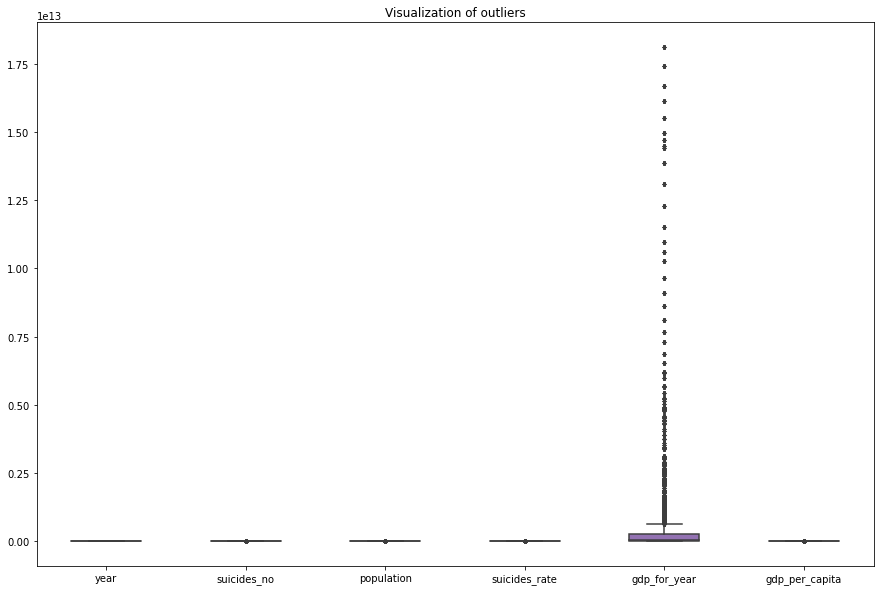

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)
plt.title("Visualization of outliers")

Obviously, there are a lot of outliers in the variable "gdp_for_year". However, considering the actual social situation, there is a huge gap in each country's GDP itself. Therefore, this essay believes that it is reasonable that there are outliers in this part, so the essay choose to keep the outliers of the "gdp_for_year" variable.

In [16]:
df.age.value_counts()

35-54 years    4642
15-24 years    4642
25-34 years    4642
55-74 years    4642
75+ years      4642
5-14 years     4610
Name: age, dtype: int64

In [17]:
df.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [18]:
df.sex.value_counts()

male      13910
female    13910
Name: sex, dtype: int64

In [19]:
df.describe()

,year,suicides_no,population,suicides_rate,gdp_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


## 4: Data Pattern Analysis and Visualisation

### Show all counrties on Map
In order to see the distribution of countries more intuitively, this paper displays the countries included in the data on the map. (these code from Dan Yaron, the link is [here](https://www.kaggle.com/kagdan/suicide-rates-data-visualization))

In [20]:
countries = df.country.unique()
print("There are {} different countries in the dataset.".format(len(countries)))

There are 101 different countries in the dataset.


<AxesSubplot:>

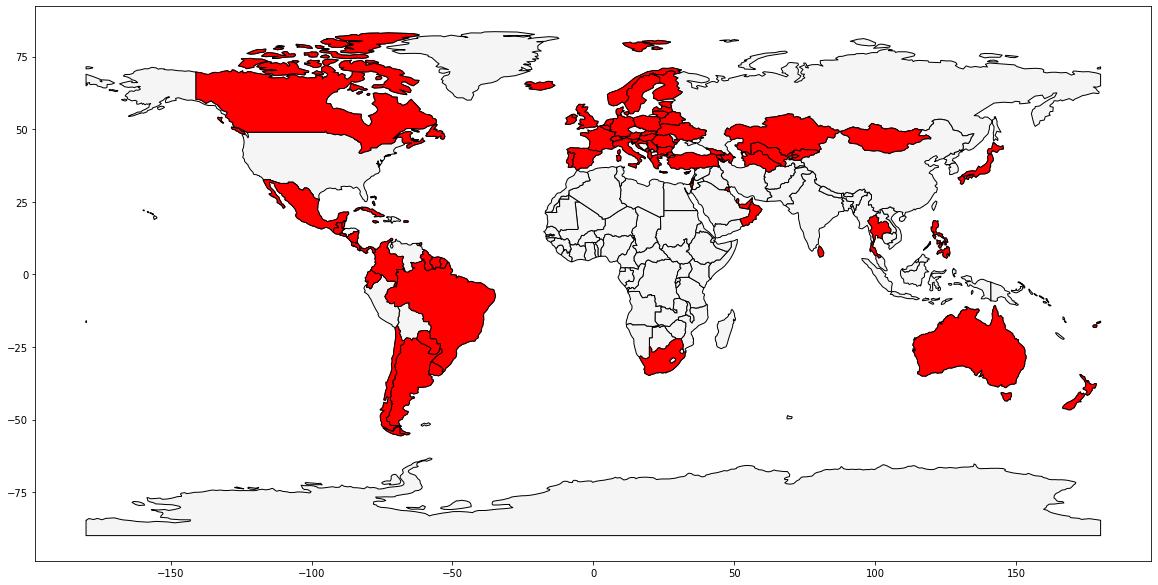

In [21]:
# Show on map
import geopandas as gpd
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries_data = world_data.loc[world_data['name'].isin(countries)]
ax = world_data.plot(figsize=(20,20), color='whitesmoke', edgecolor='black', zorder=1)
countries_data.plot(color='red', edgecolor='black', ax=ax)

In [22]:
country_not_on_map = list(set(countries) - set(world_data['name']))
country_not_on_map.sort() # Sort for ease
country_not_in_data = list(set(world_data['name']) - set(countries))
country_not_in_data.sort() # Sort for ease

<AxesSubplot:>

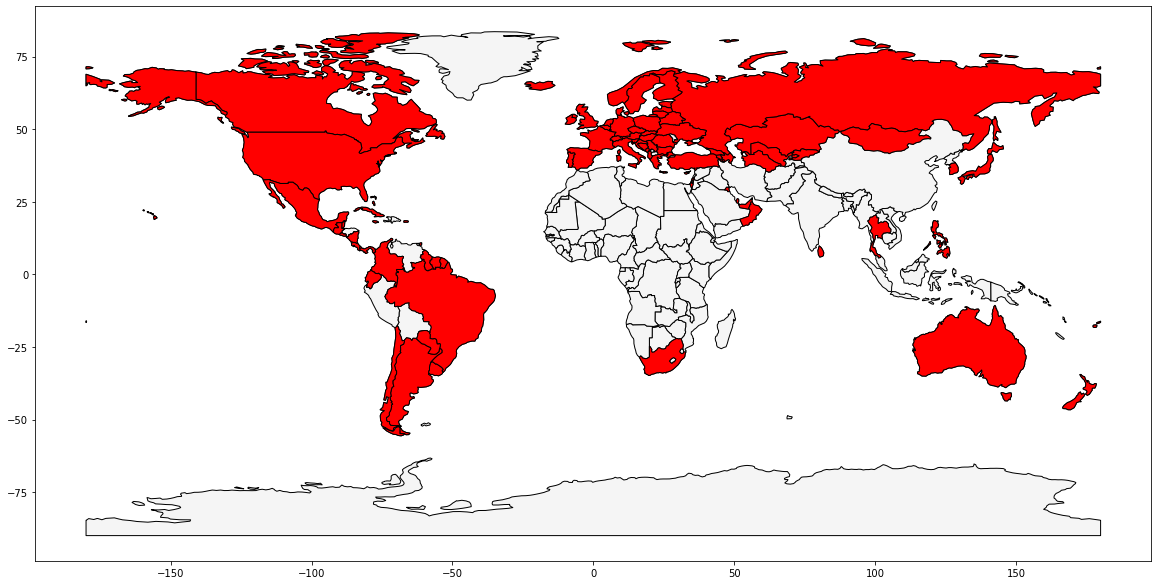

In [23]:
# Align mismatched names in the geospatial data:
world_data.loc[world_data['name'] == 'Bosnia and Herz.', 'name'] = 'Bosnia and Herzegovina'
world_data.loc[world_data['name'] == 'Czechia', 'name'] = 'Czech Republic'
world_data.loc[world_data['name'] == 'South Korea', 'name'] = 'Republic of Korea'
world_data.loc[world_data['name'] == 'Russia', 'name'] = 'Russian Federation'
world_data.loc[world_data['name'] == 'United States of America', 'name'] = 'United States'

# Replot map:
countries_data = world_data.loc[world_data['name'].isin(countries)]
ax = world_data.plot(figsize=(20,20), color='whitesmoke', edgecolor='black', zorder=1)
countries_data.plot(color='red', edgecolor='black', ax=ax)

We can see that there are 101 countries included in the data, and the countries in red represent the countries included in the data. Therefore, the data of some countries have not been published.

### Suicides_rate Analysis

<AxesSubplot:xlabel='year'>

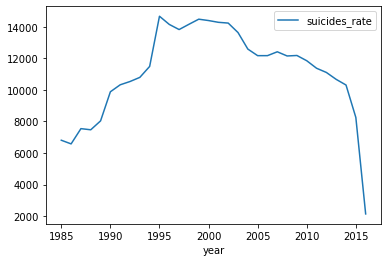

In [24]:
df[['year','suicides_rate']].groupby(['year']).sum().plot()

According to the changes in the years, we can visually analyze the suicide rate in the data, and we can find that the suicide rate increased from 1985 to 1995. After 2005, the suicide rate has dropped rapidly.

### Sex Analysis

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

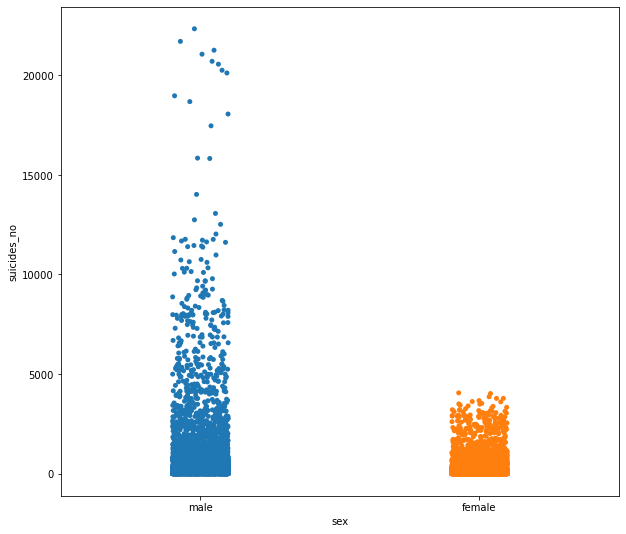

In [25]:
plt.figure(figsize=(10,9))
sns.stripplot(x='sex',y='suicides_no',data=df)

According to the analysis of the number of suicide rates, we can find that the number of male suicides is greater than the number of female suicides. This indicates that males account for the majority of the sex of suicides.

### Age Analysis

<AxesSubplot:xlabel='age', ylabel='suicides_no'>

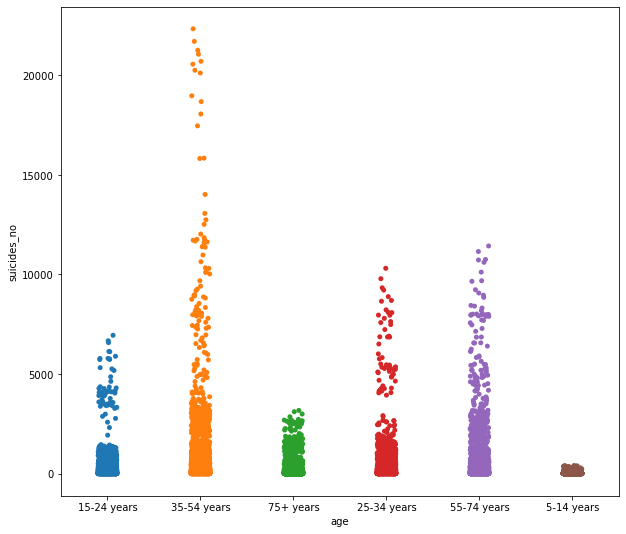

In [26]:
plt.figure(figsize=(10,9))
sns.stripplot(x='age',y='suicides_no',data=df)

In the analysis of the number of suicides at different ages, we can find that the two time periods 25-34 and 35-54 have the highest number of suicides. The number of suicides was the least in the two time periods of 5-14 and 75+ years.

### Generation Analysis

<AxesSubplot:xlabel='generation', ylabel='suicides_no'>

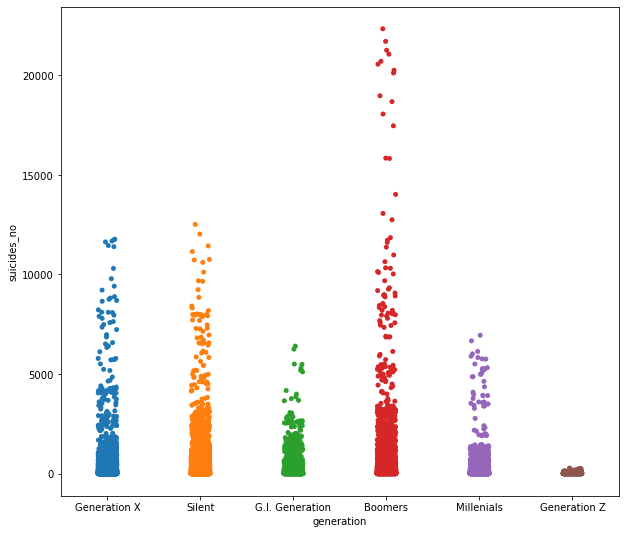

In [27]:
plt.figure(figsize=(10,9))
sns.stripplot(x="generation", y="suicides_no", data=df)

In the analysis of generation, it is obvious that people born in the period of "Boomers" have the most suicides.

### Combine different variables Analysis

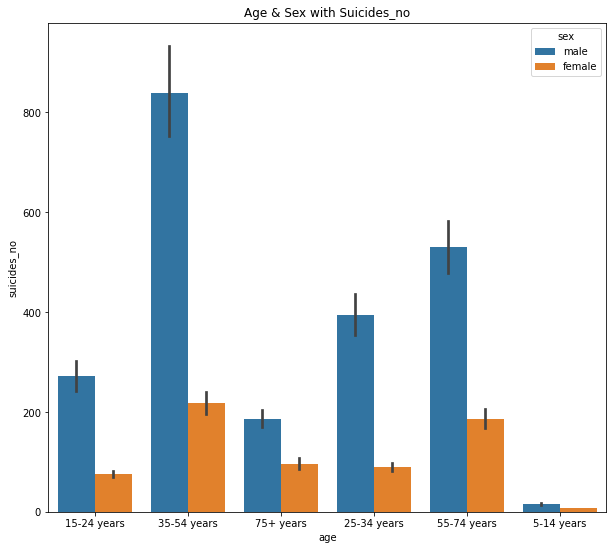

In [28]:
plt.figure(figsize=(10,9))
sns.barplot(x = "age", y = "suicides_no", hue = "sex", data = df)
plt.title("Age & Sex with Suicides_no")
plt.show()

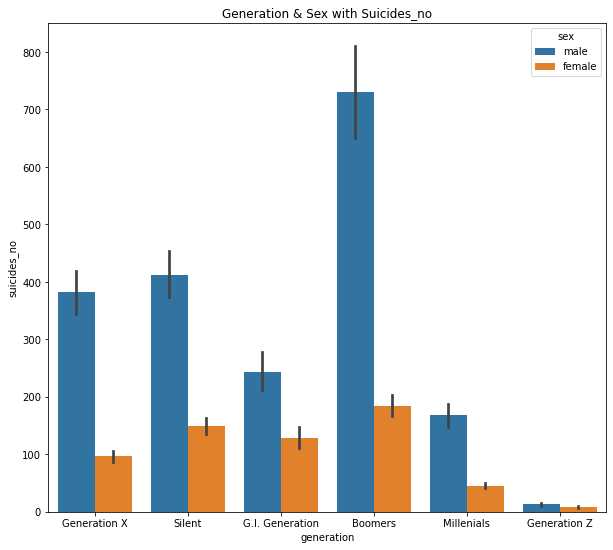

In [29]:
plt.figure(figsize=(10,9))
sns.barplot(y = "suicides_no", x = "generation", hue = "sex", data = df)
plt.title("Generation & Sex with Suicides_no")
plt.show()

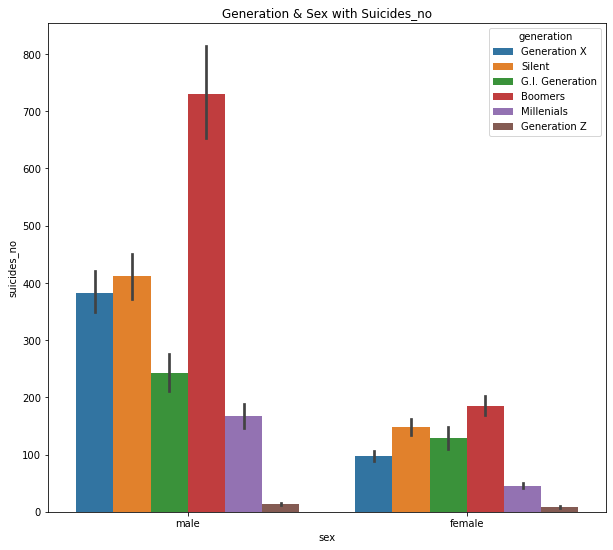

In [30]:
plt.figure(figsize=(10,9))
sns.barplot(x = "sex", y = "suicides_no", hue = "generation", data = df)
plt.title("Generation & Sex with Suicides_no")
plt.show()

In addition, this essay combines the four variables "age", "sex", "generation" and "suicides_no" to analyze together. It is found that no matter what age group, the number of male suicides is more than the number of female suicides. At the same time, whether it is male or female, the period when the number of suicides is highest is in "Boomers".

## 5: Methodology

### 5.1: First Part
In the first part, in order to research what factors has significant impact on the suicide rate, first use a heat map to see the correlation of each variable. After that, this essay uses **Stepwise regression**, the purpose is to select the most influential variables from the many variables in the data. Then this essay will use **VIF** (Variance inflation factor) to detect the multicollinearity of variables. Finally, **linear regression model**, **Decision tree regression model** and **Random forest regression model** will be used to analyze the impact of variables on suicide rates.

### 5.2: Second Part
The second part studies the performance of the **classification model** on the classification of suicide rates. This essay uses **KNN classification model**, **Logistic Regression classification model**, **Decision tree classification model**, **Random forest classification model** and **SVC classification model**. Before using these models, the data will be converted into the correct format. Therefore, the "**DictVectorizer**" function in python will be used to convert the data into content that the classifier can use. By comparing different classification models, find the model with the best classification performance.

## 6: Data Pre-processing

In [31]:
df = df.drop('country-year',axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_rate   27820 non-null  float64
 7   gdp_for_year    27820 non-null  int64  
 8   gdp_per_capita  27820 non-null  int64  
 9   generation      27820 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


In [33]:
#encoding the categorical features with LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [34]:
categorical = ['country', 'year','age', 'sex', 'generation']
for column in categorical:
    df[column] = LabelEncoder().fit_transform(df[column])

In [35]:
df.head()

,country,year,sex,age,suicides_no,population,suicides_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,6.71,2156624900,796,2
1,0,2,1,2,16,308000,5.19,2156624900,796,5
2,0,2,0,0,14,289700,4.83,2156624900,796,2
3,0,2,1,5,1,21800,4.59,2156624900,796,1
4,0,2,1,1,9,274300,3.28,2156624900,796,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  int64  
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  int64  
 3   age             27820 non-null  int64  
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_rate   27820 non-null  float64
 7   gdp_for_year    27820 non-null  int64  
 8   gdp_per_capita  27820 non-null  int64  
 9   generation      27820 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.1 MB


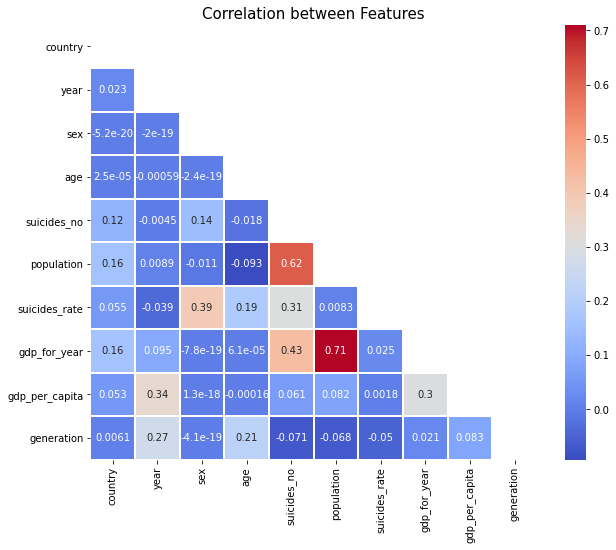

In [37]:
corr = df.corr()

plt.figure(figsize= (10,8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(df.corr(), cmap= 'coolwarm', mask= mask, linewidths= 1, annot= True)
plt.title('Correlation between Features', fontsize= 15)
plt.show()

First, this essay dropped the "country-year" in the data because it is not needed in the analysis. Because the data type of some variables in the data is "object", this essay chooses to use the "LabelEncoder" method to convert the data into "int" type. Finally, using the heat map to analyze the correlation between variables, we can find that the variables "population" and "suicides_no" and the variables "population" and "gdp_for_year" have a high positive correlation,which are 0.62 and 0.71.

## 7: Analysis

### Stepwise regression

In [38]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [39]:
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included = list(initial_list)
    while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

# backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
    return included

In [40]:
predictors_data = df.drop(columns=['suicides_rate'], axis=1)
response_data = df[['suicides_rate']]

In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [42]:
list_predictor_select_stepwise = stepwise_selection(X=predictors_data, y=response_data)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

Add  sex                            with p-value 0.0
Add  suicides_no                    with p-value 0.0
Add  age                            with p-value 2.01853e-293
Add  population                     with p-value 4.49761e-231
Add  generation                     with p-value 9.31129e-51
Add  country                        with p-value 1.83039e-18
Add  year                           with p-value 0.00186813
Add  gdp_for_year                   with p-value 0.00105437
The predictors that are selected by stepwise regression are:
['sex', 'suicides_no', 'age', 'population', 'generation', 'country', 'year', 'gdp_for_year']


We can find that there are eight variables selected.

### Variance inflation factor（VIF）

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove, thresh=5):
  
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [44]:
list_var_not_to_remove = ['sex', 'suicides_no', 'age', 'population', 'generation', 'country',
       'year', 'gdp_for_year',]
df_predictors_select_VIF = drop_column_using_vif_(predictors_data, list_var_not_to_remove, thresh=2.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: 1.2790665929309935
The columns remaining after VIF selection are:
Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')


After calculating the VIF, we can find that the maximum VIF is 1.279, which means that there is no problem of multicollinearity in the data.

### Regression Models

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF, y=response_data)

LinearRegression()

In [46]:
lr.score(df_predictors_select_VIF,response_data)

0.2899137228488339

In [47]:
regressor_OLS = sm.OLS(endog=response_data, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          suicides_rate   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     1262.
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:42:59   Log-Likelihood:            -1.1657e+05
No. Observations:               27820   AIC:                         2.332e+05
Df Residuals:                   27810   BIC:                         2.332e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.6842      0.328      8.182      0.000       2.041       3.327
country            0.0284      0.003      8.581      0.000       0.022       0.035
year              -0.0410      0.012     -3.288      0.001      -0.065      -0.017
sex               12.6175      0.195     64.594      0.000      12.235      13.000
age                2.0877      0.058     35.977      0.000       1.974       2.201
suicides_no        0.0082      0.000     59.127      0.000       0.008       0.008
population     -1.155e-06   4.14e-08    -27.917      0.000   -1.24e-06   -1.07e-06
gdp_for_year    3.095e-13   1.01e-13      3.068      0.002    1.12e-13    5.07e-13
gdp_per_capita  3.138e-07   5.74e-06      0.055      0.956   -1.09e-05    1.16e-05
generation        -0.7850      0.057    -13.869      0.000      -0.896      -0.674
==============================================================================
Omnibus:                    17044.164   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264295.262
Skew:                           2.688   Prob(JB):                         0.00
Kurtosis:                      17.110   Cond. No.                     5.35e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared of linear regression is 0.29, and the level of fitting is not very good. It may be that some other social factors have not been considered. In addition, the P-value of each variable is less than 0.01, which indicates that the variable has a significant effect on the suicide rate.

In [48]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(df_predictors_select_VIF, response_data)

DecisionTreeRegressor(random_state=0)

In [49]:
reg_tree.score(X=df_predictors_select_VIF, y=response_data)

1.0

The R-squared of the Decision tree regression is 1, which means that the level of fit is very high. But this fit is too perfect, it may be overfitting.

In [50]:
from sklearn.ensemble import RandomForestRegressor
reg_random_forest = RandomForestRegressor(random_state=0)
reg_random_forest.fit(df_predictors_select_VIF, response_data)

RandomForestRegressor(random_state=0)

In [51]:
reg_random_forest.score(X=df_predictors_select_VIF, y=response_data)

0.9991450357084627

The R-squared of Random forest regression is 0.999, which is also a very perfect fit. this essay also considers overfitting.

##  Classification models
According to the research objectives, this essay want to classifies suicide rates. However, this essay did not find the exact number that defines high and low risk suicide rates. Therefore, in this essay, I used the **average suicide rate** to define high and low risk suicide rates.

**Low risk suicide rate**: Lower than the average suicide rate

**High risk suicide rate**: Higher than the average suicide rate

In [52]:
df['risk'] = df.suicides_rate.copy()

In [53]:
df['risk']

0        6.71
1        5.19
2        4.83
3        4.59
4        3.28
         ... 
27815    2.96
27816    2.58
27817    2.17
27818    1.67
27819    1.46
Name: risk, Length: 27820, dtype: float64

In [54]:
df.head()

,country,year,sex,age,suicides_no,population,suicides_rate,gdp_for_year,gdp_per_capita,generation,risk
0,0,2,1,0,21,312900,6.71,2156624900,796,2,6.71
1,0,2,1,2,16,308000,5.19,2156624900,796,5,5.19
2,0,2,0,0,14,289700,4.83,2156624900,796,2,4.83
3,0,2,1,5,1,21800,4.59,2156624900,796,1,4.59
4,0,2,1,1,9,274300,3.28,2156624900,796,0,3.28


In [55]:
df['risk'] = np.where(df.risk < df.suicides_rate.mean(), 0, 1)

In [56]:
df['risk'].value_counts()

0    19061
1     8759
Name: risk, dtype: int64

In [57]:
df=df.drop('suicides_rate',axis=1)

In [58]:
class_df = df.drop('risk', axis=1)
y = df['risk']

In [59]:
class_df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,2156624900,796,2
1,0,2,1,2,16,308000,2156624900,796,5
2,0,2,0,0,14,289700,2156624900,796,2
3,0,2,1,5,1,21800,2156624900,796,1
4,0,2,1,1,9,274300,2156624900,796,0


In [60]:
y.value_counts()

0    19061
1     8759
Name: risk, dtype: int64

First, this essay uses the "mean" function in python to calculate the high and low risk suicide rates. At the same time, the **low risk suicide rate** is marked as **0** and the **high risk suicide rate** is marked as **1**. Then the letter y is used to represent "risk" "Columns, because the letter **y** are **labels** to be classified.

In [61]:
from sklearn.feature_extraction import DictVectorizer

In [62]:
data_dict = class_df.to_dict('record')
print(data_dict[1])

{'country': 0, 'year': 2, 'sex': 1, 'age': 2, 'suicides_no': 16, 'population': 308000, 'gdp_for_year': 2156624900, 'gdp_per_capita': 796, 'generation': 5}


In [63]:
vec = DictVectorizer()  # create the DictVectorizer object
data_mat = vec.fit_transform(data_dict)  # execute process on the record dictionaries

In [64]:
print(vec.feature_names_[0:5])
# and the mapping of variable names to indices
print(vec.vocabulary_)

['age', 'country', 'gdp_for_year', 'gdp_per_capita', 'generation']
{'country': 1, 'year': 8, 'sex': 6, 'age': 0, 'suicides_no': 7, 'population': 5, 'gdp_for_year': 2, 'gdp_per_capita': 3, 'generation': 4}


In [65]:
print(data_mat.shape)
print(type(data_mat))

(27820, 9)
<class 'scipy.sparse.csr.csr_matrix'>


In [66]:
data_array = data_mat.toarray() 
print(data_array.shape)
print(type(data_array))

(27820, 9)
<class 'numpy.ndarray'>


Before classification, this essay needs to convert the data into a data type that the classifier can use. Therefore, this essay uses the DictVectorizer function to convert data types.

### KNN classification model

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
train_d, test_d, train_lab, test_lab = train_test_split(data_array, y)

In [69]:
print(train_d.shape)
print(test_d.shape)

(20865, 9)
(6955, 9)


In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
import time
start_time = time.time()
clf_knn = KNeighborsClassifier(n_neighbors=60)  
clf_knn.fit(train_d, train_lab)  
end_time = time.time()
print(end_time - start_time)

0.031192302703857422


In [72]:
clf_knn.score(test_d, test_lab)

0.6867002156721783

In [73]:
test_pred_knn = clf_knn.predict(test_d)

In [74]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_knn)

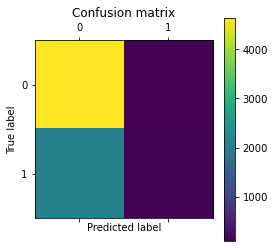

In [75]:
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [76]:
print (metrics.classification_report(test_lab, test_pred_knn))

              precision    recall  f1-score   support

           0       0.69      0.98      0.81      4750
           1       0.56      0.06      0.11      2205

    accuracy                           0.69      6955
   macro avg       0.62      0.52      0.46      6955
weighted avg       0.65      0.69      0.59      6955



According to the results of the KNN classification model, the recall score for label 1 is 0.01, and the accuracy score is 0.68. The classification performance is not very good.

### Logistic Regression classification model

In [77]:
from sklearn.linear_model import LogisticRegression

clf_logit_reg = LogisticRegression(random_state=0, max_iter=10e7).fit(train_d, train_lab)

In [78]:
test_pred_logit_reg = clf_logit_reg.predict(test_d)
print (metrics.classification_report(test_lab, test_pred_logit_reg))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81      4750
           1       0.00      0.00      0.00      2205

    accuracy                           0.68      6955
   macro avg       0.34      0.50      0.41      6955
weighted avg       0.47      0.68      0.55      6955



According to the results of the Logistic Regression classification model, the recall score for label 1 is 0.0, and the accuracy score also is 0.68. Therefore, the classification performance is not very good.

### Decision tree classification model

In [79]:
from sklearn.tree import DecisionTreeClassifier
clf_decision_tree = DecisionTreeClassifier()  
clf_decision_tree.fit(train_d, train_lab)
test_pred_decision_tree = clf_decision_tree.predict(test_d)

In [80]:
print (metrics.classification_report(test_lab, test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4750
           1       0.97      0.98      0.98      2205

    accuracy                           0.99      6955
   macro avg       0.98      0.98      0.98      6955
weighted avg       0.99      0.99      0.99      6955



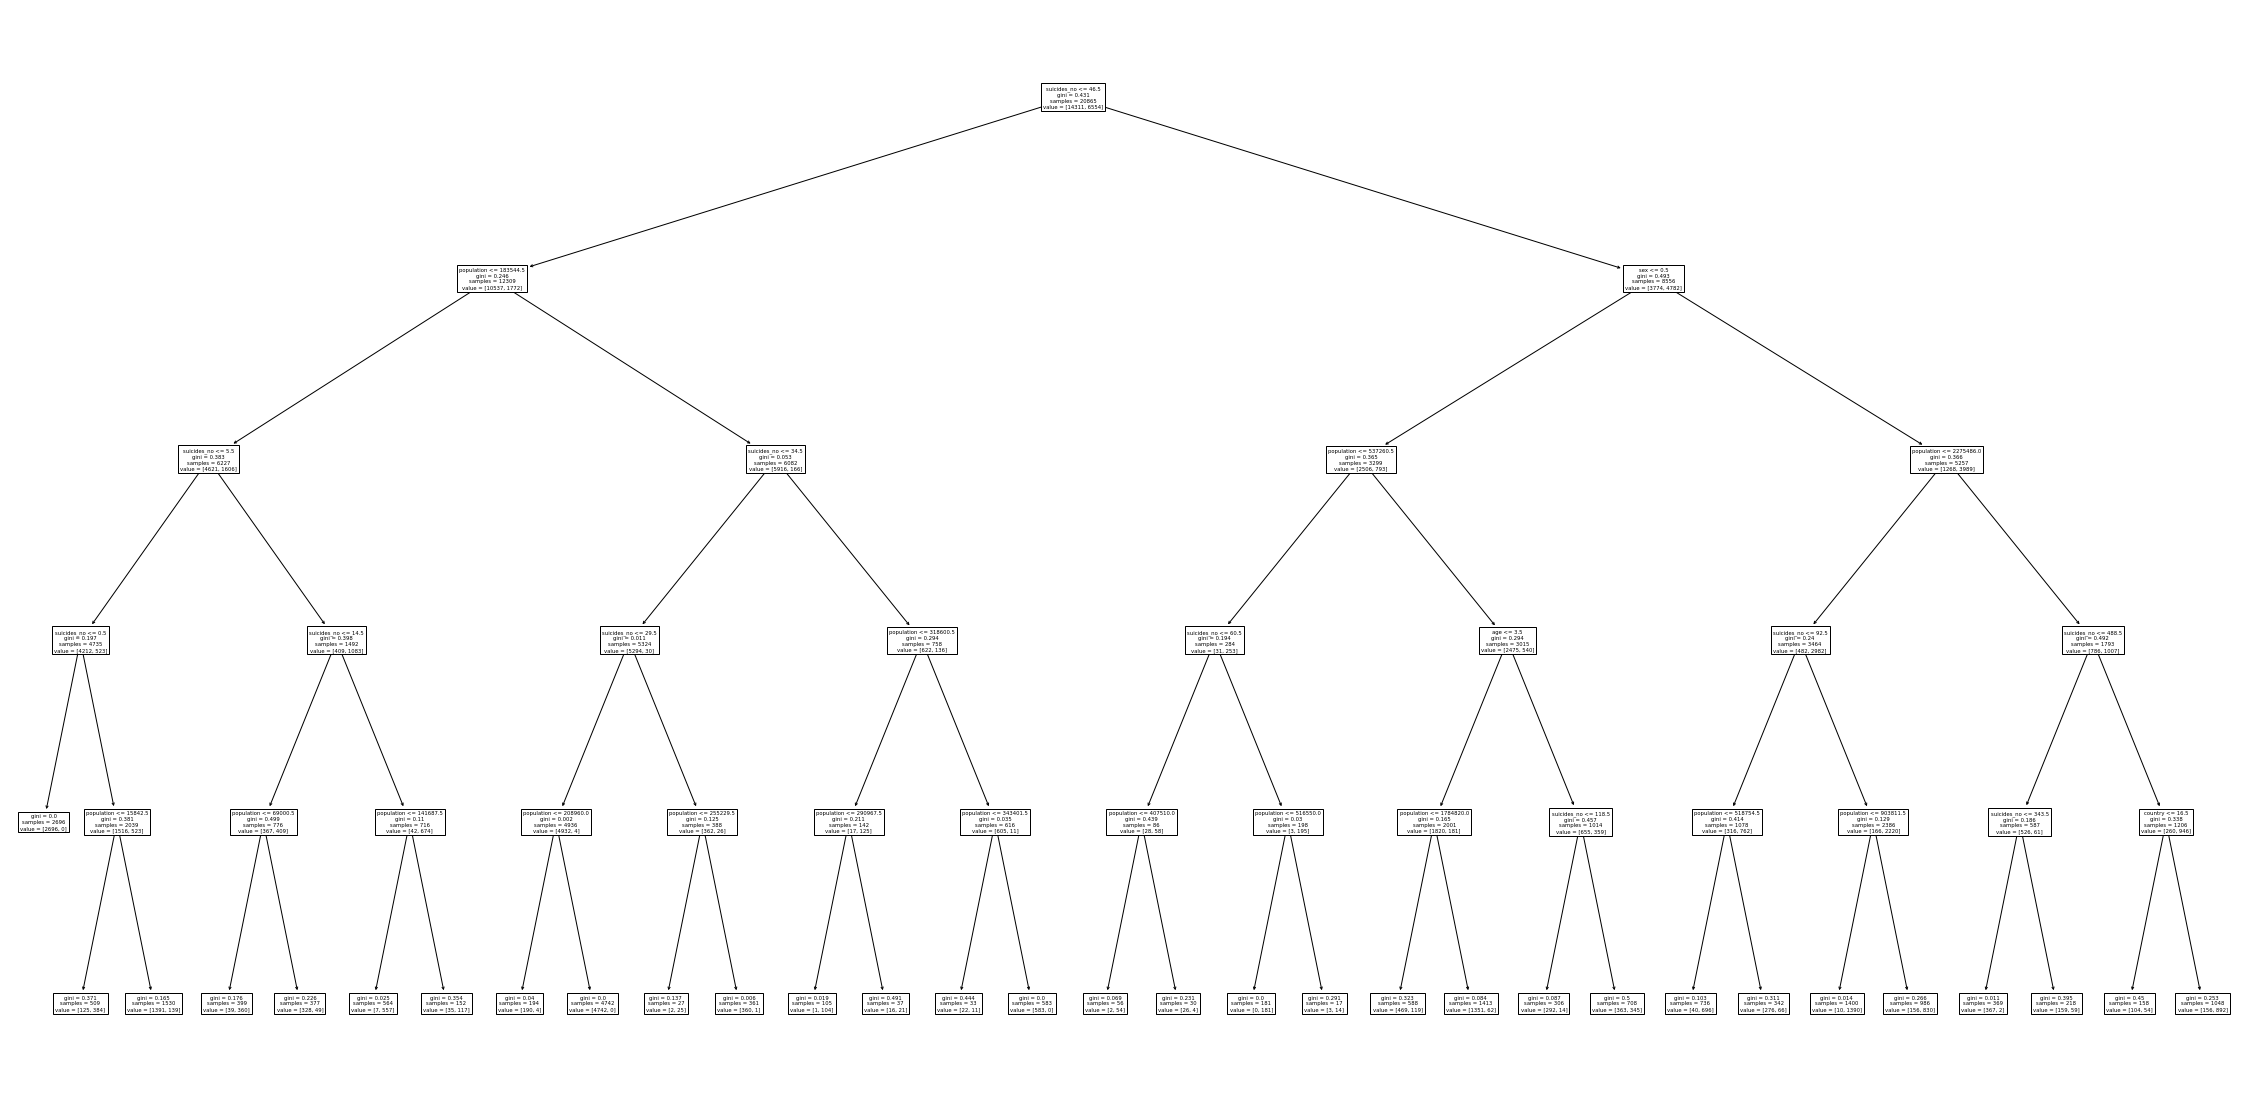

1.9516448974609375


In [81]:
decision_tree_depth_5 = DecisionTreeClassifier(max_depth=5)
decision_tree_depth_5.fit(train_d, train_lab)

plt.figure(figsize=(40,20))  
from sklearn import tree
start_time = time.time()

# vec.feature_names_ represents the variable names
_ = tree.plot_tree(decision_tree_depth_5, feature_names = vec.feature_names_)
plt.show()

end_time = time.time()
print(end_time - start_time)

In [82]:
from sklearn.tree import export_text
tree_rules = export_text(decision_tree_depth_5, feature_names=vec.feature_names_)
print(tree_rules)

|--- suicides_no <= 46.50
|   |--- population <= 183544.50
|   |   |--- suicides_no <= 5.50
|   |   |   |--- suicides_no <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- suicides_no >  0.50
|   |   |   |   |--- population <= 15842.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- population >  15842.50
|   |   |   |   |   |--- class: 0
|   |   |--- suicides_no >  5.50
|   |   |   |--- suicides_no <= 14.50
|   |   |   |   |--- population <= 69000.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- population >  69000.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- suicides_no >  14.50
|   |   |   |   |--- population <= 141687.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- population >  141687.50
|   |   |   |   |   |--- class: 1
|   |--- population >  183544.50
|   |   |--- suicides_no <= 34.50
|   |   |   |--- suicides_no <= 29.50
|   |   |   |   |--- population <= 208960.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- population >  208960

According to the results of the Decision tree classification model, it shows good performance in all three indicators and the accuracy score also is 0.99. Therefore, this classification performance is very good.

### Random forest classification model 

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
clf_Random_Forest = RandomForestClassifier()  
clf_Random_Forest.fit(train_d, train_lab)
test_pred_Random_Forest = clf_Random_Forest.predict(test_d)
print (metrics.classification_report(test_lab, test_pred_Random_Forest))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4750
           1       0.98      0.97      0.98      2205

    accuracy                           0.98      6955
   macro avg       0.98      0.98      0.98      6955
weighted avg       0.98      0.98      0.98      6955



According to the results of the Random forest classification model, it also shows good performance in all three indicators and the accuracy score also is 0.98. Thus, this classification performance is very good.

### SVC classification model

In [85]:
from sklearn.svm import SVC
clf_SVC = SVC()  
clf_SVC.fit(train_d, train_lab)
test_pred_SVC = clf_SVC.predict(test_d)
print (metrics.classification_report(test_lab, test_pred_SVC))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81      4750
           1       0.71      0.02      0.05      2205

    accuracy                           0.69      6955
   macro avg       0.70      0.51      0.43      6955
weighted avg       0.69      0.69      0.57      6955



According to the results of the SVC classification model, the recall score for label 1 is 0.02, and the accuracy score is 0.69. Therefore, this classification performance is not very good.

## 8: Results and Discussion
According to the results of Stepwise regression, the variables "sex", "age", "country", "population", "generation", "suicides_no", "year", and "gdp_for_year" are selected. The VIF value detected by the VIF is 1.279, which means that there is no multicollinearity between the variables. Then three different regression models are used. The R-squared of the linear regression model is 0.29, which indicates that the fit of the regression model is not high. At the same time, it is noted that the intercept of this model is 2.69, which means that there are some other factors and Not taken into data. On the other hand, all factors have a significant impact on the suicide rate. The correlation coefficients of the two factors "age" and "sex" are 12.61 and 2.08, which shows that there is a positive correlation with the suicide rate.

Regarding the classification model, there are four different scores to judge whether the model is appropriate. These are: precision score, recall score, accuracy score and f1-score. The purpose of this article is to classify suicide rates of different risks, so we pay more attention to the scores of f1- score and accuracy score. According to the results of the classification model, the f1-score of the KNN classification model is 0.81 and 0.11, and the accuracy score is 0.69. The f1-score of the Logistic Regression classification model is 0.82 and 0.00, and the accuracy score is 0.69. The f1-score of Decision tree classification model is 0.99 and 0.98, and the accuracy score is 0.98. The f1-score of the Random forest classification model is 0.99 and 0.97, the accuracy score is 0.98, and the f1-score of the SVC classification model is 0.82 and 0.06, and the accuracy score is 0.69. From the results, the Decision tree classification model and Random forest classification the f1- score and accuracy score of these two models are the highest, which means that the two models perform better in classifying suicide rates at different risks.

The results show that the two factors "age" and "sex" have a significant impact on the suicide rate. Combined with the pattern analysis, this article found that the 35-54 age group has the highest suicide rate. In addition, the suicide rate of men is generally higher than that of women. Comparing the research of Liu, Kayuet (2009), the conclusion drawn in this article is similar to it. The reason may be due to economic pressure and life pressure. Therefore, the government and society should pay more attention to this age group and provide necessary psychological consultation and help.

## 9: Limitation and Conclusion

### 9.1: Limitation

The selection of variables should be more in-depth, and the variables "generation", "sex", and "age" should be separated into different variables. For example, male and female in "sex", six different age groups in "age". This can provide a deeper understanding of the impact of variables on suicide rates.

The performance of the classification model can perform better. Using the GridSearchCV object, which can find the best parameters of each model and improve the performance of the model.

### 9.2: Conclusion
This essay researched the suicide rates in 101 countries from 1986 to 2006. Three different regression models found that age and gender had a very significant impact on the suicide rate. In addition, the suicide rate of high and low risk is classified, and the conclusion shows that the Decision tree classification model and the Random forest classification model have better performance in classifying the suicide rate. The variables of suicide rate should be studied more deeply in the future.

(Word Count: 2221)

## References

Delgado-Gomez, David et al., 2012. Suicide attempters classification: Toward predictive models of suicidal behavior. Neurocomputing (Amsterdam), 92, pp.3–8.

Liu, Kayuet, 2009. Suicide Rates in the World: 1950–2004. Suicide & life-threatening behavior, 39(2), pp.204–213.

Tian, H. 2013. Psychological analysis of suicide among college students and preventive measures. Chizi, (5), p.88.

Walrath, Christine et al., 2015. Impact of the Garrett Lee Smith youth suicide prevention program on suicide mortality. American journal of public health (1971), 105(5), pp.986–993.
